# Interpreting Visition Transformer With Bidirectional Interpreter and Generic Attribution

In [1]:
import paddle
import interpretdl as it

In [2]:
!ln -s ../tutorials/assets assets
# load vit model and weights
!wget -c https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ViT_base_patch16_224_pretrained.pdparams -P assets/

from assets.vision_transformer import ViT_base_patch16_224
paddle_model = ViT_base_patch16_224()
MODEL_PATH = 'assets/ViT_base_patch16_224_pretrained.pdparams'
paddle_model.set_dict(paddle.load(MODEL_PATH))

--2022-07-07 13:31:05--  https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ViT_base_patch16_224_pretrained.pdparams
Resolving paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)... 10.70.0.165
Connecting to paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)|10.70.0.165|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



W0707 13:31:05.999433 134468 gpu_context.cc:278] Please NOTE: device: 0, GPU Compute Capability: 8.0, Driver API Version: 11.2, Runtime API Version: 11.2
W0707 13:31:06.010289 134468 gpu_context.cc:306] device: 0, cuDNN Version: 8.1.


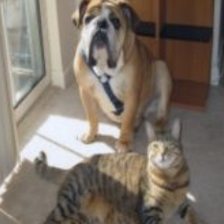

In [3]:
from PIL import Image
from interpretdl.data_processor.readers import read_image

img_path = 'assets/catdog.png'
x = Image.fromarray(read_image(img_path)[0])
x

## Bidirectional Transformer Interpreter

In [4]:
bt = it.BTCVInterpreter(paddle_model, device='gpu:0')

### Token-wise

/opt/conda/envs/pp2/lib/python3.7/site-packages/paddle/fluid/dygraph/varbase_patch_methods.py:522: UserWarning: 
tensor.grad will return the tensor value of the gradient. This is an incompatible upgrade for tensor.grad API.  It's return type changes from numpy.ndarray in version 2.0 to paddle.Tensor in version 2.1.0.  If you want to get the numpy value of the gradient, you can use :code:`x.grad.numpy()` 
  warnings.warn(warning_msg)


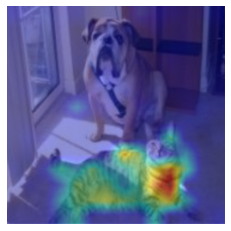

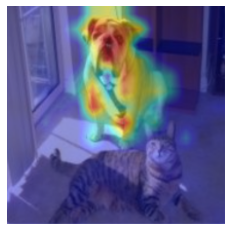

In [5]:
heatmap = bt.interpret(
        img_path,
        ap_mode = 'token',
        start_layer=4,
        label=None,  # cat
        visual=True,
        save_path=None)
heatmap = bt.interpret(
        img_path,
        ap_mode = 'token',
        start_layer=4,
        label=243,  # dog
        visual=True,
        save_path=None)

### Head-wise

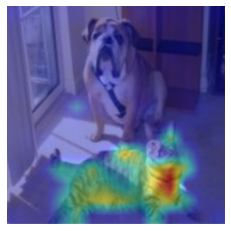

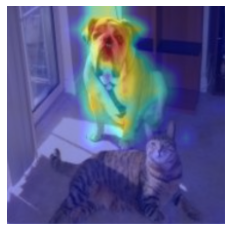

In [7]:
heatmap = bt.interpret(
        img_path,
        start_layer=4,
        label=None,  # cat
        visual=True,
        save_path=None)
heatmap = bt.interpret(
        img_path,
        start_layer=4,
        label=243,  # dog
        visual=True,
        save_path=None)

## Generic Attribution

In [11]:
ga = it.GACVInterpreter(paddle_model, device='gpu:0')

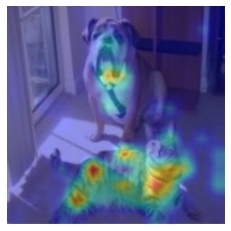

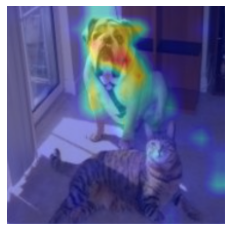

In [12]:
heatmap = ga.interpret(
        img_path,
        start_layer=4,
        label=None,  # cat
        visual=True,
        save_path=None)
heatmap = ga.interpret(
        img_path,
        start_layer=4,
        label=243,  # dog
        visual=True,
        save_path=None)